## Kernel PCA example 

In [15]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np 

In [16]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]  
    gamma: float
        Tuning parameter of the RBF kernel    
    n_components: int
        Number of principal components to return    
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
        Projected dataset   
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    
    # Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)])    
    return X_pc



### Example — separating half-moon shapes

Now, let us apply our rbf_kernel_pca on some nonlinear example datasets. We will start by creating a two-dimensional dataset of 100 example points representing two half-moon shapes:"""




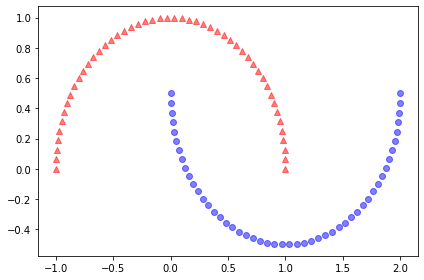

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

n_examples = 100
X, y = make_moons(n_examples, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

For the purposes of illustration, the half-moon of triangle symbols will represent one class, and the half-moon depicted by the circle symbols will represent the examples from another class:

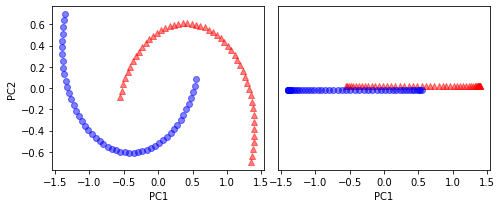

In [18]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

Clearly, we can see in the resulting figure that a linear classifier would be unable to perform well on the dataset transformed via standard PCA.

Note that when we plotted the first principal component only (right subplot), we shifted the triangular examples slightly upwards and the circular examples slightly downwards to better visualize the class overlap. As the left subplot shows, the original half-moon shapes are only slightly sheared and flipped across the vertical center — this transformation would not help a linear classifier in discriminating between circles and triangles. Similarly, the circles and triangles corresponding to the two half-moon shapes are not linearly separable if we project the dataset onto a one-dimensional feature axis, as shown in the right subplot.
Now, let’s try out our kernel PCA function, rbf_kernel_pca.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


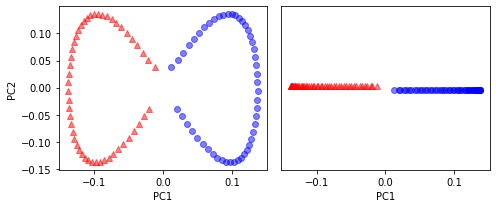

In [19]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()


We can now see that the two classes (circles and triangles) are linearly well separated so that we have a suitable training dataset for linear classifiers.

Unfortunately, there is no universal value for the tuning parameter, that works well for different datasets. Finding a value that is appropriate for a given problem requires experimentation.